https://www.tensorflow.org/quantum/tutorials/mnist

In [102]:
# Update package resources to account for version changes.
import importlib, pkg_resources
importlib.reload(pkg_resources)

<module 'pkg_resources' from '/home/mfikih15/Env/lib/python3.6/site-packages/pkg_resources/__init__.py'>

In [103]:
import tensorflow as tf
import tensorflow_quantum as tfq

import cirq
import sympy
import numpy as np
import seaborn as sns
import collections

# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit

In [104]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.4.1


In [105]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0

In [106]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

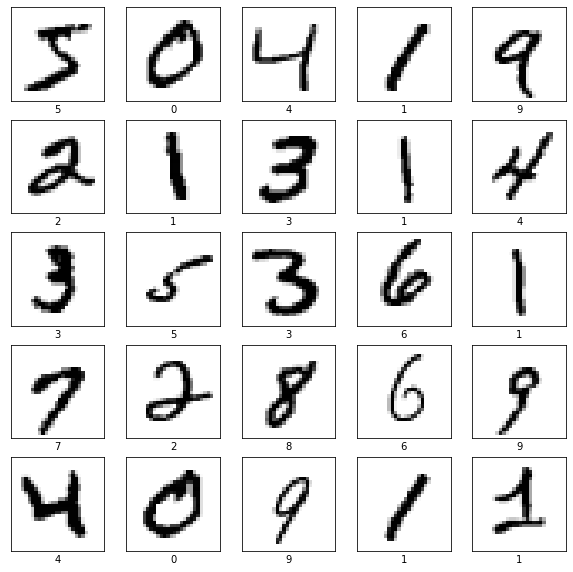

In [107]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [108]:
x_train.shape

(60000, 28, 28, 1)

In [109]:
y_train.shape

(60000,)

In [110]:
def create_classical_model():
    # A simple model based off LeNet from https://keras.io/examples/mnist_cnn/
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32, [3, 3], activation='relu', input_shape=(28,28,1)))
    model.add(tf.keras.layers.Conv2D(64, [3, 3], activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(10))
    return model


model = create_classical_model()
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_23 (Dropout)         (None, 128)             

In [111]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.14015052,  0.02662753, -0.0374314 ,  0.03946139, -0.03159024,
        -0.08223049,  0.02698355, -0.00863216,  0.03130182,  0.09791369]],
      dtype=float32)

In [112]:
tf.nn.softmax(predictions).numpy()

array([[0.11252057, 0.10044528, 0.09421262, 0.10174268, 0.09476454,
        0.09008513, 0.10048104, 0.09696532, 0.10091588, 0.10786702]],
      dtype=float32)

In [113]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [114]:
loss_fn(y_train[:1], predictions).numpy()

2.407

In [115]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.3610 - accuracy: 0.8870
Epoch 2/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0817 - accuracy: 0.9753
Epoch 3/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0642 - accuracy: 0.9811
Epoch 4/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0515 - accuracy: 0.9847
Epoch 5/5
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0432 - accuracy: 0.9868


In [116]:
cnn_results = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0274 - accuracy: 0.9924


In [117]:
model.save_weights('./model_cnn/fix')

In [118]:
def create_classical_model():
    # A simple model based off LeNet from https://keras.io/examples/mnist_cnn/
    model_new = tf.keras.Sequential()
    model_new.add(tf.keras.layers.Conv2D(32, [3, 3], activation='relu', input_shape=(28,28,1)))
    model_new.add(tf.keras.layers.Conv2D(64, [3, 3], activation='relu'))
    model_new.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model_new.add(tf.keras.layers.Dropout(0.25))
    model_new.add(tf.keras.layers.Flatten())
    model_new.add(tf.keras.layers.Dense(128, activation='relu'))
    model_new.add(tf.keras.layers.Dropout(0.5))
    model_new.add(tf.keras.layers.Dense(10))
    return model


model_new = create_classical_model()
model_new.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model_new.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_23 (Dropout)         (None, 128)             

In [119]:
model_new.load_weights('./model_cnn/fix')

In [120]:
probability_model = tf.keras.Sequential([
  model_new,
  tf.keras.layers.Softmax()
])

In [121]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.4374413e-12, 3.1527552e-08, 1.2932028e-07, 4.0860037e-08,
        2.8758755e-09, 9.6207431e-11, 3.2651799e-15, 9.9999964e-01,
        9.6668062e-10, 2.0057502e-07],
       [2.6907224e-10, 3.4352464e-08, 1.0000000e+00, 7.0493467e-10,
        1.7071951e-10, 2.6638188e-12, 3.3582668e-09, 4.9881060e-10,
        3.7283430e-11, 8.5685051e-13],
       [1.6630682e-09, 9.9999797e-01, 5.1055457e-07, 1.2466828e-10,
        4.8101691e-07, 3.1779983e-08, 4.7980922e-07, 4.2311649e-07,
        1.4288703e-07, 1.0064135e-08],
       [9.9998188e-01, 5.6379762e-12, 1.0972599e-08, 1.3044836e-11,
        4.8369025e-10, 1.1043556e-10, 1.8057552e-05, 2.3182640e-09,
        2.2489567e-10, 4.9877450e-08],
       [3.8664776e-08, 2.6108873e-07, 8.8930099e-09, 3.0411115e-10,
        9.9994445e-01, 4.1819574e-09, 2.4376131e-08, 1.2571000e-07,
        2.9709349e-07, 5.4838536e-05]], dtype=float32)>

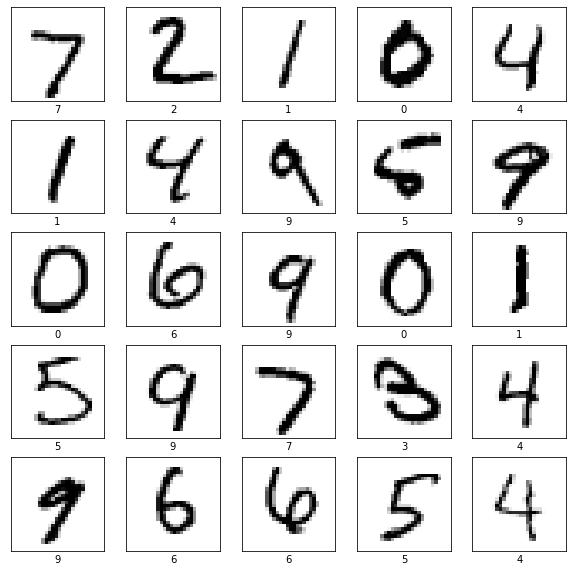

In [122]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[i]])
plt.show()

In [123]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)


In [124]:
predictions = probability_model.predict(x_test)

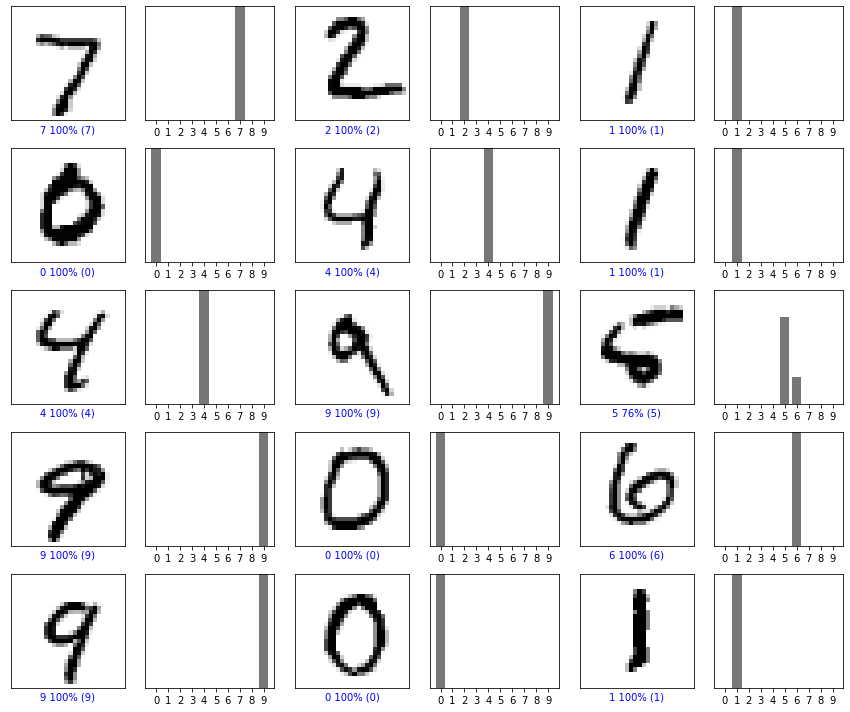

In [125]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i],  y_test)
plt.tight_layout()
plt.show()